**The prediction of the knowledge level of users (UNS) by their standardized exam performances for related objects with goal object (LPR) and their standardized exam performances for goal object (PEG)**

***I) Introduction***

We are trying to set up a model that answers the predictive question: **"Whether the category of the knowledge level of users (UNS) could be predicted by two continuous variables, their standardized exam performance for related objects with goal object (LPR), and their standardized exam performance for goal object (PEG), and if so, what the relationship is (whether it is linear or non-linear, positive or negative, and strong or weak)?"**, in which all of the variables are from the dataset "modeling_data_xlsx". We will do so by creating a model that predicts UNS, which the model would be trained with data on LPR and PEG. We would do this by running a classification analysis for the three variables using the K-nearest neighbors algorithm. This could be significant since it could possibly show the relationship between exam scores and users' knowledge levels. If a relationship exists and is strong, then we would learn that we could utilize exams to test someone's knowledge level. Besides, by the correlation results, we could know whether the exam performance of users on goal objects (PEG) or related objects (LPR) are better predictors of UNS. This could possibly inspire future users on which object to focus on to optimize their knowledge level.

This notebook is our electronic report on this project. It is divided into six parts, after our **introduction** where we explain the background information on the topic, the question we are trying to answer with your project, and the dataset used; the second part would be the **terminology explanation**. Following that, we will talk about the **method** we are going to utilize in our path to answer our predictive question. After that, we will run our **data analysis**, with notes written on top of our codes to explain which step we are doing. The fifth section is going to be our **written results** section, in which we are going to explain what we have found in the data analysis step, how it answers our predictive question, and what we can conclude from it. Next, the **discussion** section discusses what the next steps could be, including what future analysts can focus on, how this contributes to the literature, and what we could have done better on. Last, we are going to provide references to our project.

***II) Terminology***

- Response variable:
   -  UNS: Categorical and scaled variable, represents the knowledge level of the users.

- Predictive variables:
    - LPR (Learning Performance Rating): Continuous and scaled variable, the exam performance of the user for related objects with the goal object.
    - PEG: Continuous and scaled Variable, the exam performance of the user for goal objects.

***III) Methods***

We have used the publicly available data "modeling_data_xlsx", on examination scores and knowledge levels from the University of California. We selected the variables LPR, PEG, and UNS. In particular, the predictors are LPR, and PEG, both continuous, while the response variable would be the categorical variable UNS. We split the data into training set and testing set with a ratio of 3:1 on random and carried out classification analysis using the k-nearest neighbors algorithm, with 5-fold cross-validation, on the training set. We picked the optimal k-value with the highest accuracy (6) and formulated our final prediction model and carried out predictions on UNS on the testing set. We then re-evaluated the accuracy of our prediction model by computing its prediction accuracy (calculated by dividing the number of correct predictions by the total number of predictions). To visualize our results, we would graph a 2D scatter-plot, for UNS vs LPR and PEG. We also showed its confusion matrix to further evaluate its usefulness and how strong the model is and determined if the two independent variables are strong predictors of UNS.

To explain everything we have done precisely, here are the steps we have done in our data analysis:
1. Loaded R packages
2. Read our data using the read_excel function
3. Cleaned our data (changing UNS into a categorical variable, selected only the variables we need (LPR, PED, UNS)
4. Split our data into training and testing set
5. Summarized our data based on only the training set(number of observations, mean, minimum, maximum, standard deviation, available categories of UNS, distribution of the categories as a sum of all observations)
6. Visualized the three variables to see whether a relationship exists (using non-standardized data)
7. Created a recipe using training data, including standardization
8. Created a tibble for standardized data and visualize the relationship of variables using standardized data
9. Created a model specification with neighbors being tuned
10. Created a sequence of neighbors and split our set into five folds
11. Created a workflow and ran cross-validation based on the sequence of neighbors
12. Analyzed the predicted accuracies of different neighbors (graphed neighbors vs k, tabulated accuracy of neighbors)
13. Found the neighbor best suited, and ran full classification analysis using this value on the full training set to formulate our final model (including creating a new model specification and workflow)
14. Using the model, we predicted the testing data
15. Evaluated the accuracy of our model
16. Graphed our results and created a confusion matrix

***IV) Results (Data analysis)***

In [1]:
#loading packages
library(tidyverse)
library(repr)
library(readxl)
library(cowplot)
library(tidymodels)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
#reading the data 
modeling_data <- read_excel("modeling_data_xlsx.xlsx")
modeling_data 

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


In [3]:
#cleaning the data by changing UNS into a categorical variable, since it is initially in character format
modeling_data_mutated <- mutate(modeling_data, UNS = as_factor(UNS))
modeling_data_mutated

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


In [4]:
#cleaning the data, selecting the three variables of interest, LPR, PEG, UNS
modeling_data_selected <- select(modeling_data_mutated, LPR, PEG, UNS)
modeling_data_selected

LPR,PEG,UNS
<dbl>,<dbl>,<fct>
0.00,0.00,very_low
0.24,0.90,High
0.25,0.33,Low
⋮,⋮,⋮
0.29,0.77,High
0.61,0.26,Middle
0.87,0.74,High


In [5]:
#splitting into training and testing data, with 75% of the data as the training set and 25% as the testing set. 
#Setting the seed so our results would be reproducible
#Using the strata argument for UNS to get roughly the same percentage of each class in both the training and testing set
set.seed(1)

modeling_split <- initial_split(modeling_data_selected, prop = 0.75, strata = UNS) 
modeling_training <- training(modeling_split) 
modeling_testing <- testing(modeling_split)

modeling_split
modeling_training
modeling_testing

<Training/Testing/Total>
<192/66/258>

LPR,PEG,UNS
<dbl>,<dbl>,<fct>
0.00,0.0,very_low
0.24,0.9,High
0.35,0.8,High
⋮,⋮,⋮
0.31,0.50,Middle
0.19,0.60,Middle
0.61,0.26,Middle


LPR,PEG,UNS
<dbl>,<dbl>,<fct>
0.29,0.56,Middle
0.20,0.85,High
0.30,0.81,High
⋮,⋮,⋮
0.30,0.52,Middle
0.65,0.25,Middle
0.89,0.88,High


In [7]:
#summarizing the training data (number of observations in total)
nrow(modeling_training)

[1] 192

In [8]:
#summarizing the training data (mean of the numeric variables, LPR and PEG)
modeling_data_summarize <- summarize(modeling_training, 
                                     mean_LPR = mean(LPR),
                                    mean_PEG = mean(PEG),
                                     )
modeling_data_summarize

mean_LPR,mean_PEG
<dbl>,<dbl>
0.425,0.4568385


In [9]:
#summarizing the data (min, max of the numeric variables, LPR and PEG)
modeling_data_summarize <- summarize(modeling_training, 
                                     min_LPR = min(LPR),
                                    min_PEG = min(PEG),
                                    max_LPR = max(LPR),
                                    max_PEG = max(PEG),
                                    )
modeling_data_summarize

min_LPR,min_PEG,max_LPR,max_PEG
<dbl>,<dbl>,<dbl>,<dbl>
0,0,0.98,0.93


In [10]:
#summarizing the training data (standard deviation of the numeric variables, LPR and PEG)
modeling_data_summarize <- summarize(modeling_training, 
                                    sd_LPR = sd(LPR),
                                     sd_PEG = sd(PEG)
                                    )
modeling_data_summarize

sd_LPR,sd_PEG
<dbl>,<dbl>
0.2511627,0.260728


In [11]:
#summarizing the training data (categories/classes of UNS)
modeling_training|>
pull(UNS) |>
levels()

[1] "very_low" "High"     "Low"      "Middle"

In [6]:
#summarize (FULL DATASET) UNS by showing the number of observations for each class of UNS and the percentage of them in terms of the total dataset.


number_of_observations_in_total <- nrow(modeling_data_selected)
modeling_data_summarize <- modeling_data_selected|>
group_by(UNS) |>
summarize(count = n(),
          percentage = n() / number_of_observations_in_total * 100)
modeling_data_summarize 

UNS,count,percentage
<fct>,<int>,<dbl>
very_low,24,9.302326
High,63,24.418605
Low,83,32.170543
Middle,88,34.108527


In [12]:
#summarizing the training data (classes in percentage of overall data)

number_of_observations <- nrow(modeling_training)
modeling_data_summarize <- modeling_training |>
group_by(UNS) |>
summarize(count = n(),
          percentage = n() / number_of_observations * 100)
modeling_data_summarize 

UNS,count,percentage
<fct>,<int>,<dbl>
very_low,20,10.41667
High,47,24.47917
Low,61,31.77083
Middle,64,33.33333


In the above code, we have found that the strata argument when creating the initial split worked well because the percentages of each class to the training set are roughly the same as that of the overall data.

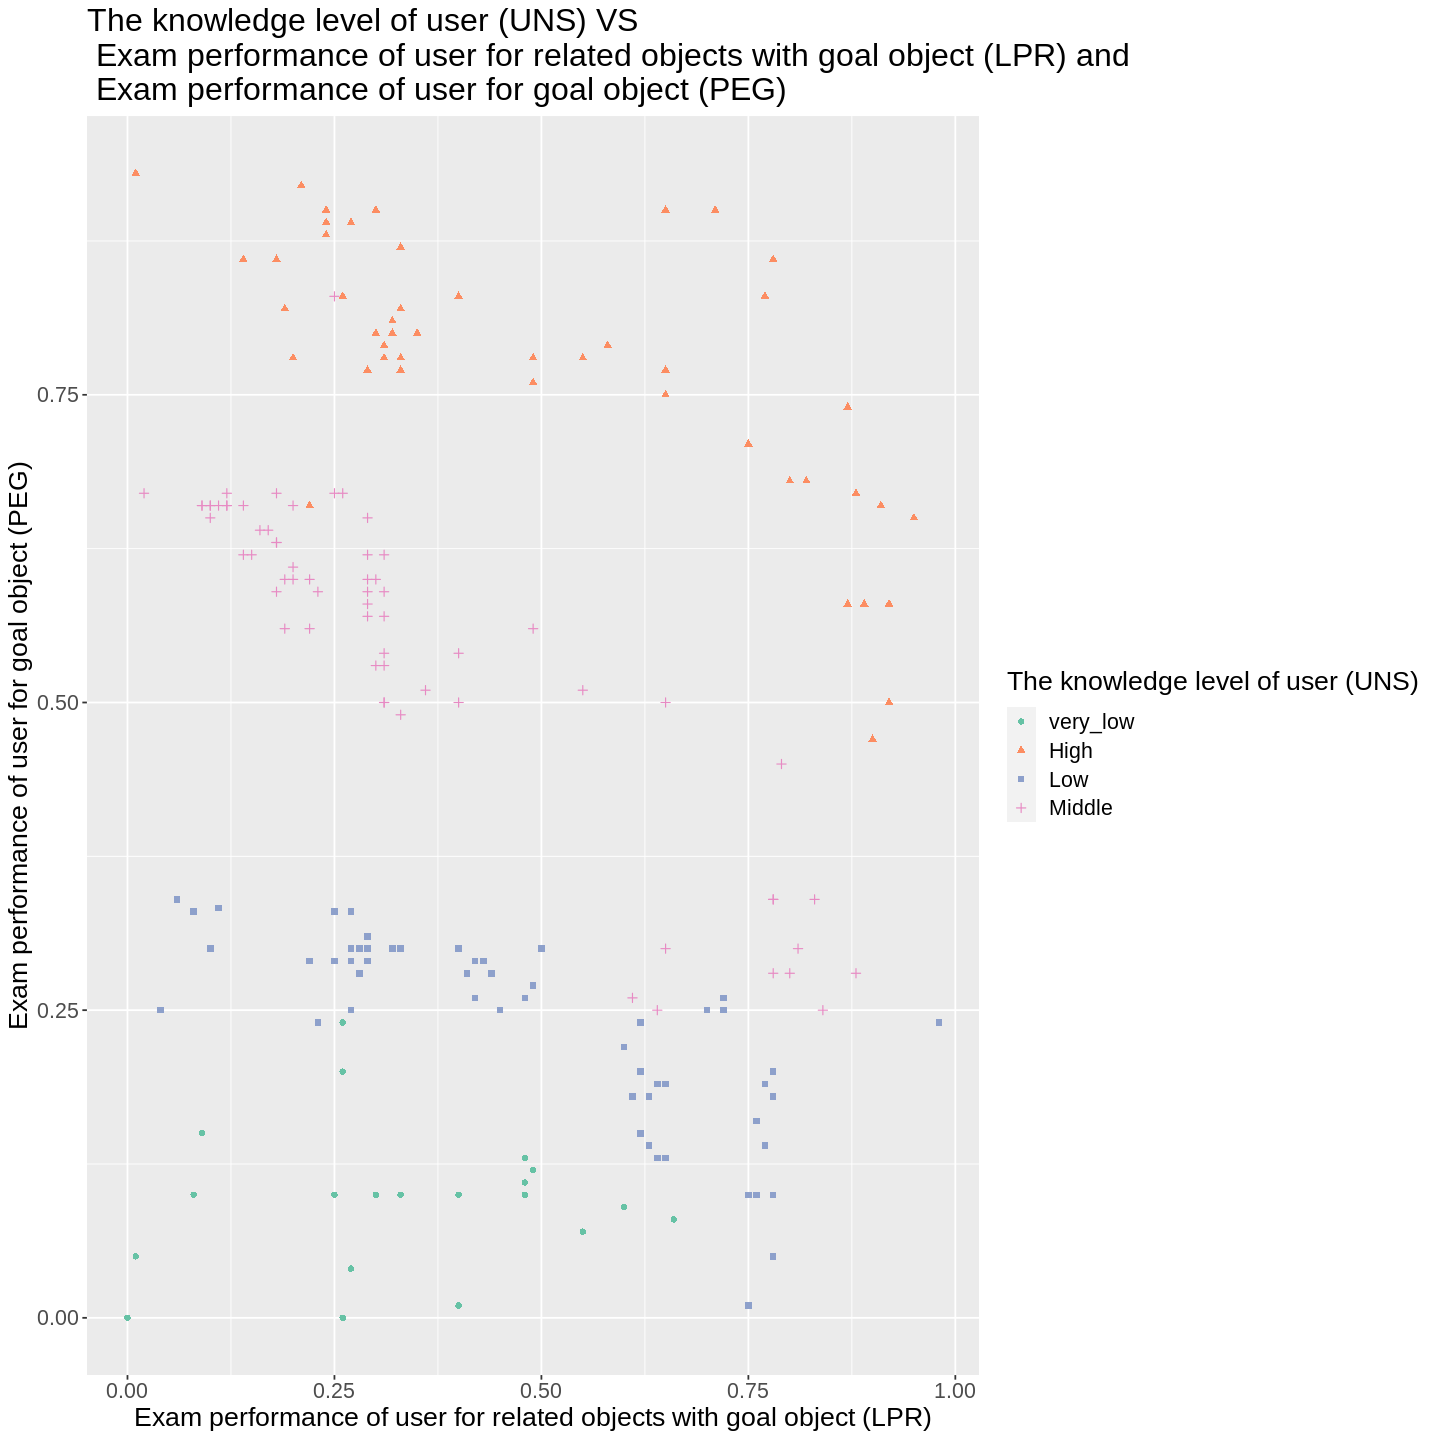

In [13]:
#visualising the data of UNS vs STG and SCG (Variables are yet standardized)
# We do this to first examine whether there are relationships between the two predictive variables and the response variable

options(repr.plot.width = 12, repr.plot.height = 12)

modeling_data_plot <- ggplot(modeling_training, aes(x = LPR, y = PEG, colour = UNS, shape = UNS)) +
        geom_point(alpha = 2) +
        labs(x = "Exam performance of user for related objects with goal object (LPR)", y = "Exam performance of user for goal object (PEG)" , colour = "The knowledge level of user (UNS)", shape = "The knowledge level of user (UNS)") +
        ggtitle("The knowledge level of user (UNS) VS \n Exam performance of user for related objects with goal object (LPR) and \n Exam performance of user for goal object (PEG)") +
        theme(text = element_text(size = 16)) +
        scale_color_brewer(palette = "Set2")

modeling_data_plot

In the above plot, we found that there is in fact a very strong positive linear relationship between PEG and UNS, however, the positive relationship between LPR and UNS is much much weaker, and in fact not obvious at all. However, we are still going to stick with two predictors and one response variable for the rest of our project.


In [29]:
#create recipe for training data, a specification for k

set.seed(1)
modeling_recipe <- recipe(UNS ~ LPR + PEG, data = modeling_training) |> 
step_scale(all_predictors()) |>
step_center(all_predictors()) |>
prep()

modeling_recipe



Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Training data contained 192 data points and no missing data.

Operations:

Scaling for LPR, PEG [trained]
Centering for LPR, PEG [trained]

In [30]:
#Created a tibble that bakes the recipe such that we could have standardized data

modeling_scaled <- bake(modeling_recipe, modeling_training)
modeling_scaled

LPR,PEG,UNS
<dbl>,<dbl>,<fct>
-1.6921300,-1.752165,very_low
-0.7365742,1.699708,High
-0.2986112,1.316166,High
⋮,⋮,⋮
-0.4578705,0.1655421,Middle
-0.9356483,0.5490835,Middle
0.7365742,-0.7549573,Middle


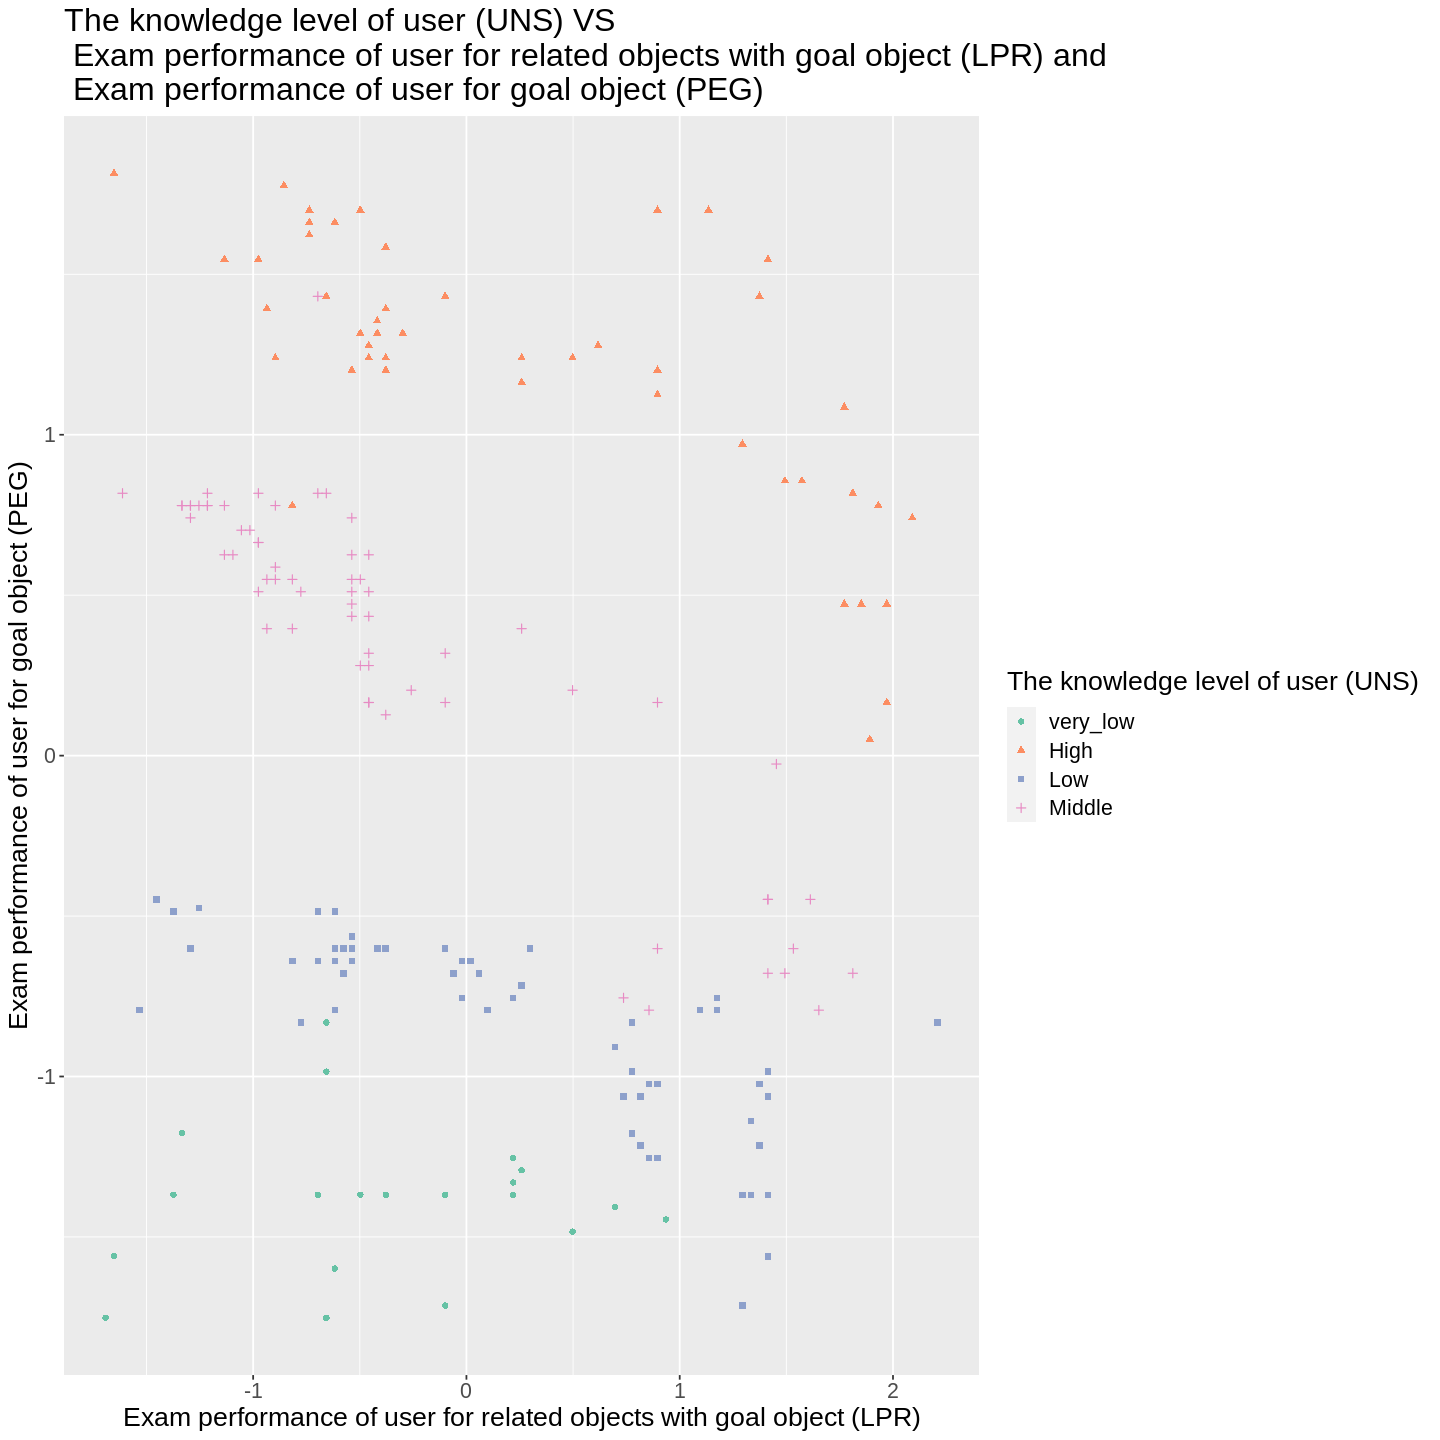

In [31]:
#Added a visualisation that includes standardized variables of the training set so that the relationships of scaled variables could be seen
options(repr.plot.width = 12, repr.plot.height = 12)

modeling_data_plot <- ggplot(modeling_scaled, aes(x = LPR, y = PEG, colour = UNS, shape = UNS)) +
        geom_point(alpha = 2) +
        labs(x = "Exam performance of user for related objects with goal object (LPR)", y = "Exam performance of user for goal object (PEG)" , colour = "The knowledge level of user (UNS)", shape = "The knowledge level of user (UNS)") +
        ggtitle("The knowledge level of user (UNS) VS \n Exam performance of user for related objects with goal object (LPR) and \n Exam performance of user for goal object (PEG)") +
        theme(text = element_text(size = 16)) +
        scale_color_brewer(palette = "Set2")

modeling_data_plot



In [32]:
#creating a classification model specification for the training data using the kknn engine, with neighbors equal to tune, since we would conduct cross-validation to actually choose our final K later.

set.seed(1)

modeling_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
set_engine("kknn") |> 
set_mode("classification")

modeling_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [33]:
# 5-fold cross-validation, choose the number of neighbors with the maximum accuracy
# By creating 5 folds with stratification on UNS 
# And by creating a tibble on the sequence of neighbors 
# And by creating a workflow fitting the modeling_recipe and modeling_spec

set.seed(1)
modeling_vfold <- vfold_cv(modeling_training, v = 5, strata = UNS) 
modeling_vals <- tibble(neighbors = seq(1, 101, by = 5)) 

modeling_workflow <- workflow() |> 
    add_recipe(modeling_recipe) |> 
    add_model(modeling_spec) |>
    tune_grid(resamples = modeling_vfold, grid = modeling_vals) |> 
    collect_metrics() 

modeling_workflow

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9476029,5,0.008787816,Preprocessor1_Model01
1,roc_auc,hand_till,0.9610399,5,0.012260026,Preprocessor1_Model01
6,accuracy,multiclass,0.9480151,5,0.008029494,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
96,roc_auc,hand_till,0.8167346,5,0.01451846,Preprocessor1_Model20
101,accuracy,multiclass,0.4785035,5,0.03159243,Preprocessor1_Model21
101,roc_auc,hand_till,0.8164004,5,0.01412639,Preprocessor1_Model21


In [34]:
# Tabulating the accuracies for each neighbor (average accuracy of cross-validation), and arrange them in descending order based on their prediction accuracy.

accuracies <- modeling_workflow |>
        filter(.metric == "accuracy")|>
        arrange(desc(mean)) 

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
6,accuracy,multiclass,0.9480151,5,0.008029494,Preprocessor1_Model02
1,accuracy,multiclass,0.9476029,5,0.008787816,Preprocessor1_Model01
11,accuracy,multiclass,0.9224888,5,0.013089744,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
91,accuracy,multiclass,0.4890298,5,0.03074111,Preprocessor1_Model19
96,accuracy,multiclass,0.4786384,5,0.02642746,Preprocessor1_Model20
101,accuracy,multiclass,0.4785035,5,0.03159243,Preprocessor1_Model21


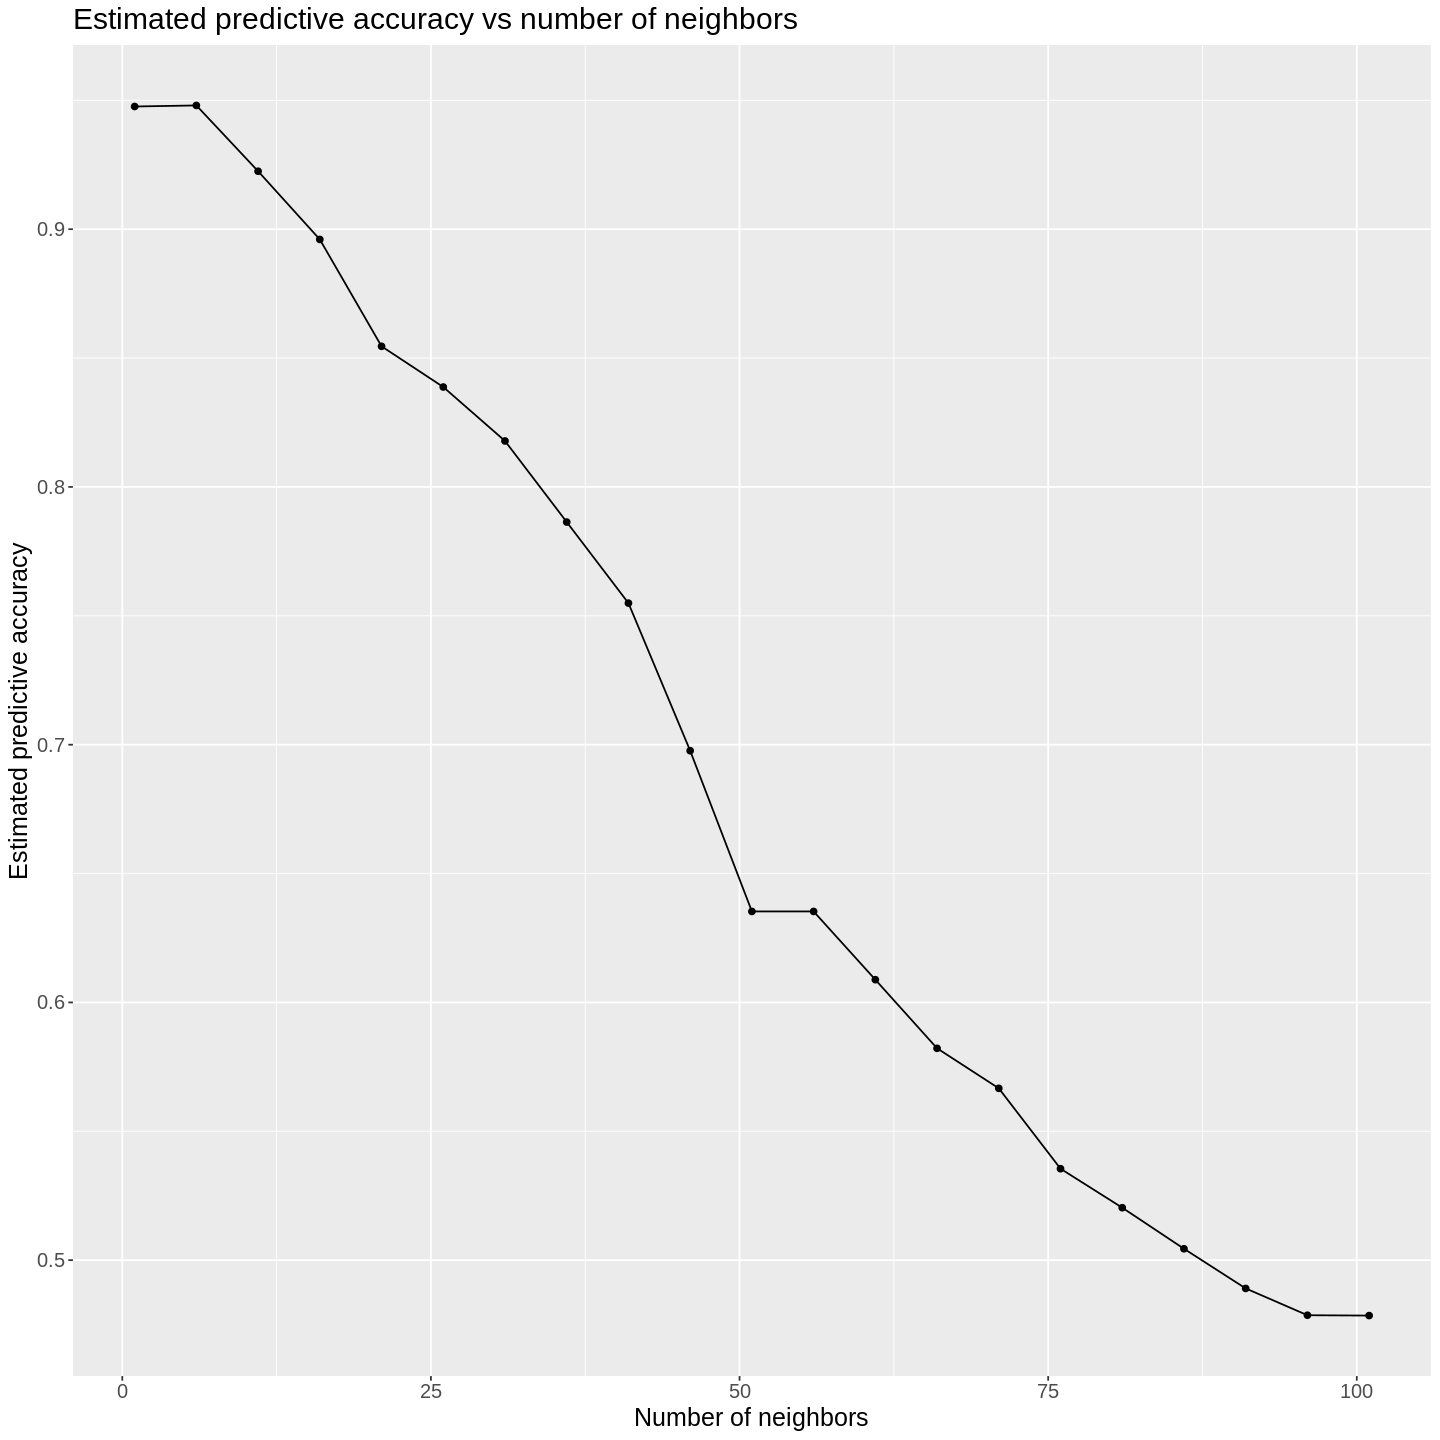

In [20]:
#Graphing K values VS their respective accuracies

accuracies_vs_neighbors <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                            geom_point(alpha = 1)+
                            geom_line()+
                            labs(x = "Number of neighbors", y = "Estimated predictive accuracy")+
                            theme(text = element_text(size = 15)) +
                            ggtitle("Estimated predictive accuracy vs number of neighbors")

accuracies_vs_neighbors

In [35]:
#Finding which K value has the highest accuracy

k_max_accuracy <- accuracies|>
        slice(1) |>
        pull(neighbors)

k_max_accuracy 

[1] 6

Based on the plot above and the results of the result code, we have chosen '6' as the most well-suited number of neighbors. It yields the highest predictive accuracy (94.8%), and modifying the number of neighbors still result in a predictive accuracy of greater than 90%. We conclude this number of neighbor should be both accurate and stable in making predictions.

In [22]:
#Choose the optimal K (6) to run the full analyis on test, creating the workflow for making our final model (by fitting the full training set on the workflow)

modeling_spec_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = k_max_accuracy )|>
        set_engine("kknn") |> 
        set_mode("classification")

modeling_workflow_fit <- workflow()|> 
        add_recipe(modeling_recipe) |>
        add_model(modeling_spec_2) |> 
        fit(data = modeling_training) 
modeling_workflow_fit


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(6,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.05208333
Best kernel: rectangular
Best k: 6

In [23]:
set.seed(1)
#predicting the testing set using our model with 6 neighbors, and binding the columns of the modeling_testing set.

modeling_predict <- modeling_workflow_fit |> 
        predict(modeling_testing) |> 
        bind_cols(modeling_testing)

modeling_predict  

.pred_class,LPR,PEG,UNS
<fct>,<dbl>,<dbl>,<fct>
Middle,0.29,0.56,Middle
High,0.20,0.85,High
High,0.30,0.81,High
⋮,⋮,⋮,⋮
Middle,0.30,0.52,Middle
Middle,0.65,0.25,Middle
High,0.89,0.88,High


In [24]:
#Evaluating the accuracy of our model on the testing set (with 6 neighbors).
modeling_accuracies <- modeling_predict |>
                        metrics(truth = UNS, estimate = .pred_class) |>
                        filter(.metric == "accuracy") |>
                        select(-.estimator)

modeling_accuracies 

.metric,.estimate
<chr>,<dbl>
accuracy,0.9848485


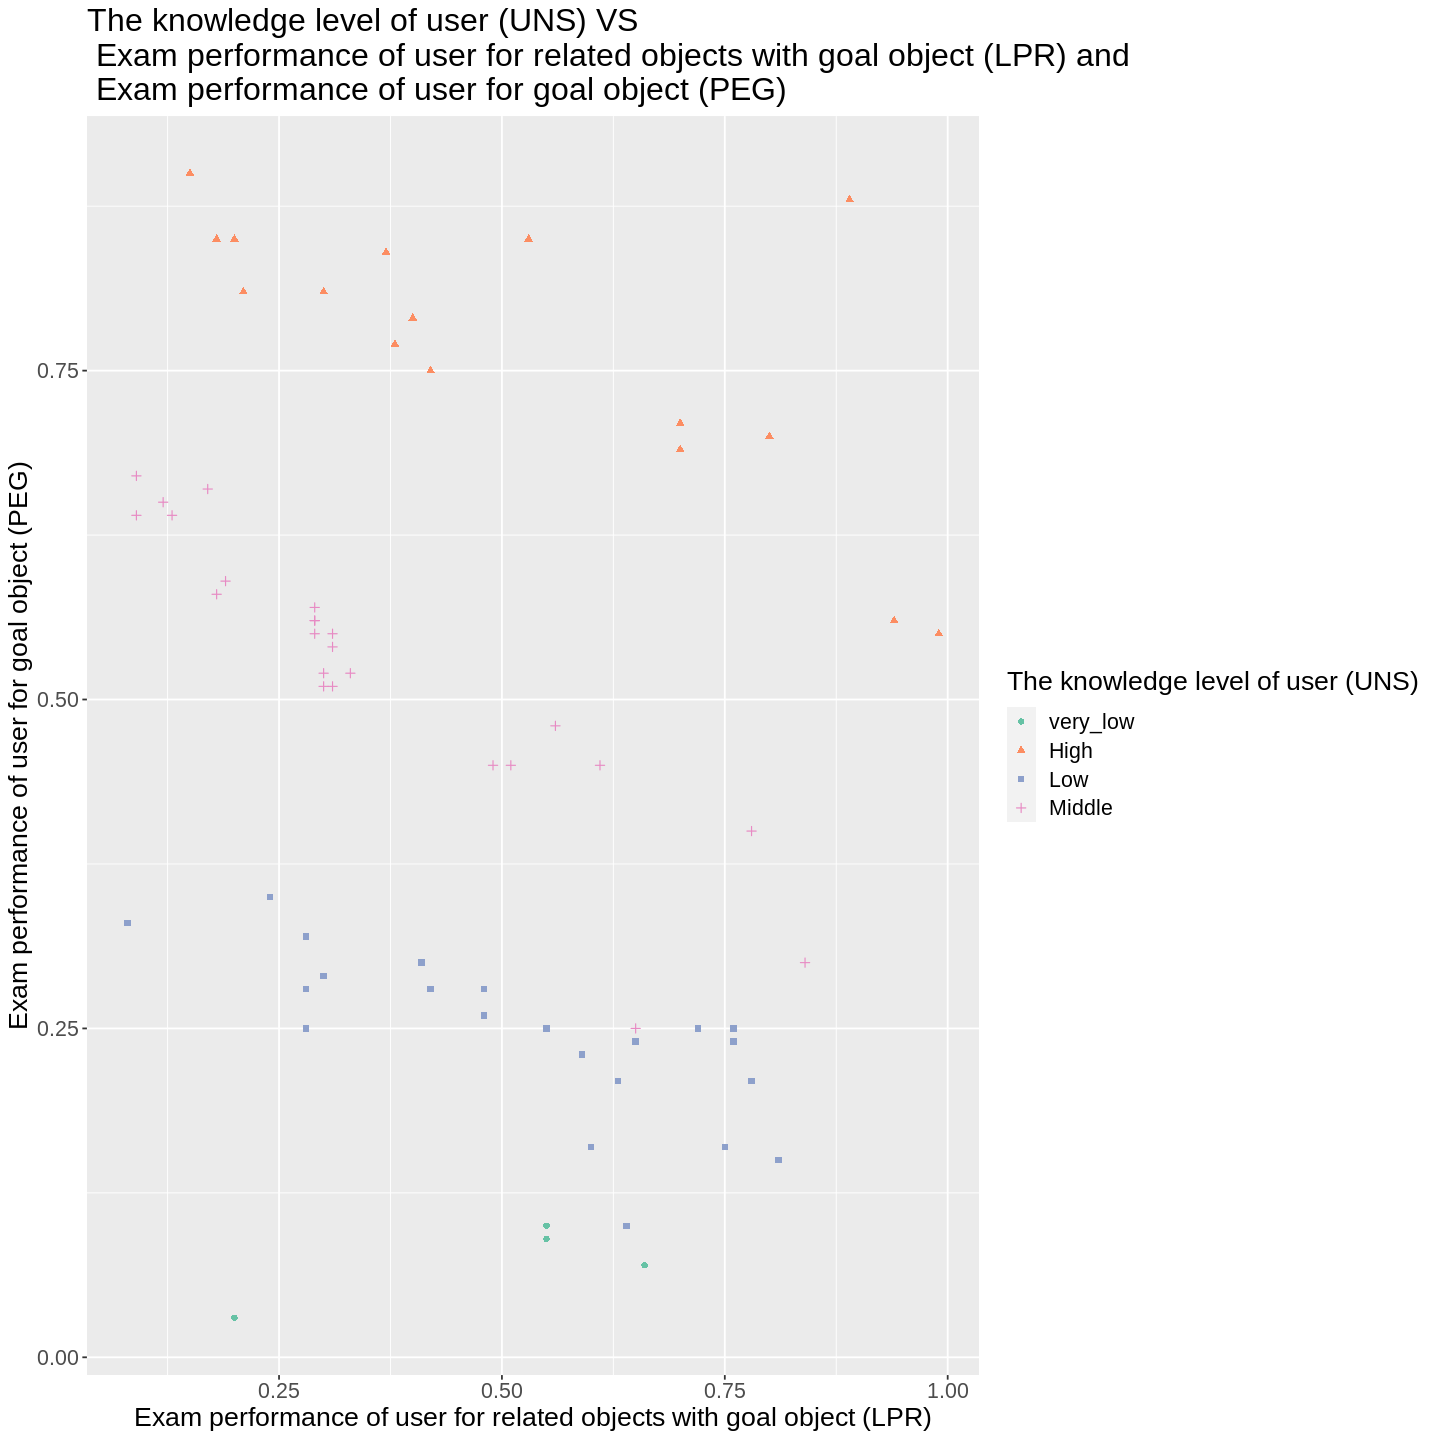

In [25]:
#graph the training set. 

options(repr.plot.width = 12, repr.plot.height = 12)

modeling_testing_plot <- ggplot(modeling_testing, aes(x = LPR, y = PEG, colour = UNS, shape = UNS)) +
        geom_point(alpha = 5) +
        labs(x = "Exam performance of user for related objects with goal object (LPR)", y = "Exam performance of user for goal object (PEG)" , colour = "The knowledge level of user (UNS)", shape = "The knowledge level of user (UNS)") +
        ggtitle("The knowledge level of user (UNS) VS \n Exam performance of user for related objects with goal object (LPR) and \n Exam performance of user for goal object (PEG)") +
        theme(text = element_text(size = 16))+
        scale_color_brewer(palette = "Set2")

modeling_testing_plot

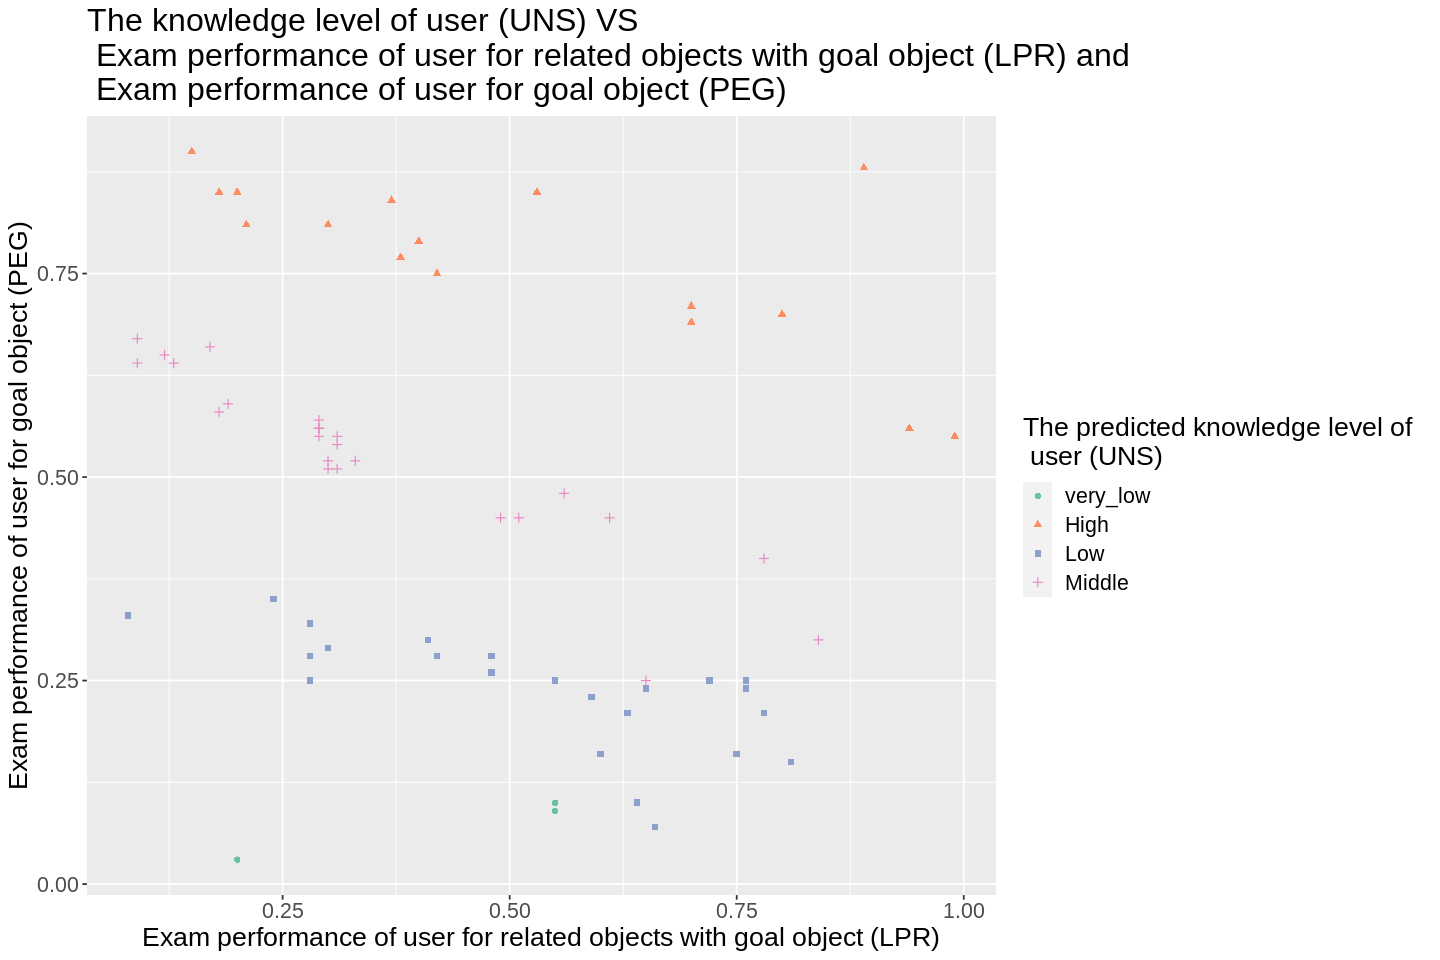

In [45]:
#graph our results of our final model prediction on the testing set, with the colours differentiated from the predictive classes from our model

options(repr.plot.width = 12, repr.plot.height = 8)

modeling_prediction_plot <- ggplot(modeling_predict, aes(x = LPR, y = PEG, colour = .pred_class, shape = .pred_class)) +
        geom_point(alpha = 5) +
        labs(x = "Exam performance of user for related objects with goal object (LPR)", y = "Exam performance of user for goal object (PEG)" , colour = "The predicted knowledge level of \n user (UNS)", shape = "The predicted knowledge level of \n user (UNS)") +
        ggtitle("The knowledge level of user (UNS) VS \n Exam performance of user for related objects with goal object (LPR) and \n Exam performance of user for goal object (PEG)") +
        theme(text = element_text(size = 16))+
        scale_color_brewer(palette = "Set2")

modeling_prediction_plot



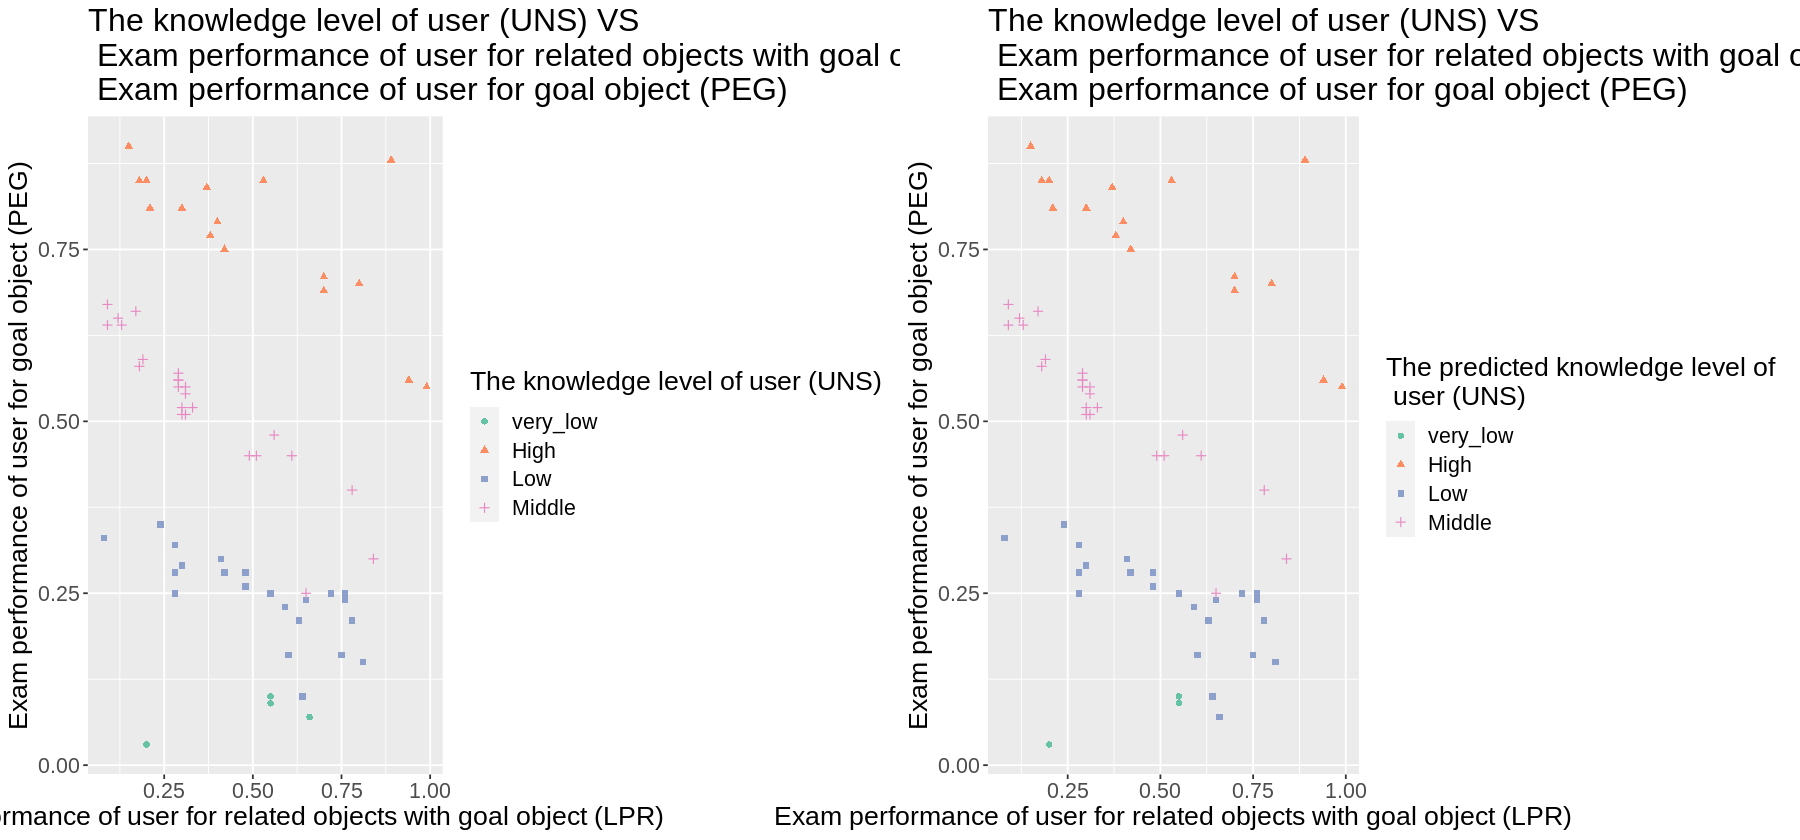

In [46]:
#comparing the two plots to learn about the accuracy of the model visually

options(repr.plot.width = 15, repr.plot.height = 7)
plot_grid(modeling_testing_plot, modeling_prediction_plot, ncol = 2)

In [38]:
#confusion matrix on the testing set to further assess the strength of our model. 
#Allowed us to evaluate the accuracy of our predictions across different knowledge level categories. 
modeling_conf_mat <- conf_mat(modeling_predict, truth = UNS, estimate = .pred_class)

modeling_conf_mat


          Truth
Prediction very_low High Low Middle
  very_low        3    0   0      0
  High            0   16   0      0
  Low             1    0  22      0
  Middle          0    0   0     24

***V) Results (Written)***

We successfully built a model to answer the prediction question, which indeed we can use users' exam performances on goal objects (PEG) and goal-related objects (LPR) of users to predict their level of knowledge (UNS). Using the K-nearest neighbors algorithm for classification analysis on the three variables, we show the relationships between the test scores (LPR, PEG) and users' knowledge level (UNS) are positive, which that of PEG and UNS is linear and much stronger than the relationship between LPR and UNS.

We trained our model using the training set through the k-nearest neighbors algorithm, and we used 5-fold cross-validations to choose the optimal K value which is 6 and created our final model based on this. We then used the model to predict the testing set such that we would get a sense of how strong it is. Our final model had a prediction accuracy of 98.48%(by dividing the number of correct predictions by the total number of predictions in the test set). As a matter of fact, there is only one incorrect prediction, which the model predicted the knowledge level of a user to be 'low' when indeed the actual level is 'very low'. We conclude that our model is very accurate.

Notably, the accuracy of our model on the testing set surpassed the prediction accuracy on the training set, indicating the power and accuracy of our model.

To visually represent the results, we constructed a two-dimensional scatter plot illustrating the relationship between UNS and the independent variables, LPR and PEG. The scatter plot provided valuable insights into the predictive power of these variables for determining knowledge levels. Upon analysis of the testing scatter plot, we observed a clear trend: as PEG scores increase, UNS levels also exhibited an upward trajectory. Conversely, the change in LPR scores had a negligible impact on UNS levels, indicating that PEG was a stronger predictor of knowledge level.


***VI) Discussion***

Based on this project, we understand the relationship of UNS and LPR against PEG, and successfully created a model with a predictive accuracy of around 98%. Our predictions can be useful for evaluating teaching effectiveness, understanding the allocation of students' time to improve their knowledge level most, and examining how great indicator exams are on the knowledge of students. 

For example, with a strong positive relationship between PEG and UNS, we can assess students' knowledge levels based on their performances on quizzes in DSCI100 and make appropriate adjustments so that most students can master the material successfully.
Knowing that a low UNS score doesn't necessarily indicate poor exam performances on goal-related objects (LPR), but is highly correlated positively with exam performances on goal objects, students can better allocate their time and energy on goal objects (such as studying the codes in DSCI) instead of goal-related ones (such as computer logistics and English) to achieve higher knowledge level.

As another example, studying the correlations between UNS, LPR, and PEG can provide some basis for university admissions. It allows for a better understanding of students' individual abilities and enables the grouping of students with similar exam abilities and knowledge levels in the same class, reducing administrative difficulties and costs. We found that exam performances on goal objects better predict knowledge level, the administrative staff could use this as a basis for recruiting students and offering admissions.

Overall, by analyzing the relationships between UNS, LPR, and PEG, we can provide students with recommendations on where to focus their time and attention to improve their knowledge level. These predictions can also serve as an assessment model for incoming students' exam abilities, providing a theoretical foundation for adjusting the difficulty of exams and courses in higher education institutions. Future researchers/ administrative officers could possibly use our model to predict how knowledgeable someone is, based on these two predictors, since our accuracy is as high as 98%.

Future data analysts could correlate the time input of students onto tasks and their exam results, in order to link between knowledge level and their use of time, and so that our proposition of students focusing on goal objects could be more crystallized. We could also further investigate how knowledge level relates to job success and salary, in order to link exam performances/ time input on career achievement, such that our findings could be more useful and applicable to real-world decisions. Furthermore, we can also examine how studying main goal objects improve knowledge better than related objects (the mechanics behind them). This would be a great fundamental question that could also increase the persuasiveness of our findings.

Despite our efforts, we could have done something different to improve our project. For example, we could have graphed our results in a better way so that the plot could summarize and explain our results better. We could have also examined the correlations between variables better before starting our project and potentially choose whether there exist other variables that could have increased the accuracy of our predictive model, such as using forward selection talked about in chapter 6 of the textbook.

***References***

1) Tiffany Timbers, T. C. (2022, September 24). Data science. Chapter 6 Classification II: evaluation &amp; tuning. https://datasciencebook.ca/classification2.html#summary-1 
2) User knowledge modeling. UCI Machine Learning Repository. (n.d.). https://archive.ics.uci.edu/dataset/257/user+knowledge+modeling 